## Image Files / Useful conversion methods

#### Motivation

Images captured from a camera can be represented by an array object (numpy).

If such such an array object needs to be transferred to another application (stored on a remote computer) there are several options:

1) store array object as file and start transfer file over the network to the remote computer. This requires some kind of file transfer (possibly using SSH / SFTP)

2) convert array object to bytearray. Then the transfer of bytes over the network can use sockets or websockets. Thus we avoid saving data to a file before starting to transfer data over the network. Depending on the particular application the transfer of data will be faster than using file-based data transfer.

This notebook shows how to convert an image represented originally as an array object into a bytearray (suitable to be sent over the network).

Finally (after bytes have been transferred and stored in a bytearray) the corresponding bytearray needs to be restored again into an array object to represent the original image.

In [7]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

### Load file 

jpeg file is represented by numpy array after reading

BGR order (due to opencv's imread() is changed by reindexing

In [8]:
imgFile1 = "img/cistern_caffee.jpg"

img1_as_array = cv2.imread(imgFile1)[:, :, [2, 1, 0]]
data = img1_as_array.tobytes()

# save byte data to file
imgFile1_data = "img/cistern_caffee_data.dat"
with open(imgFile1_data, 'wb') as fid:
    fid.write(data)

print(f"data type: {type(data)}")

print(f"img1_as_array.size              : {img1_as_array.size}")
print(f"img1_as_array.shape             : {img1_as_array.shape}")
print(f"nr of bytes of data (bytearray) : {len(data)}")

data type: <class 'bytes'>
img1_as_array.size              : 15116544
img1_as_array.shape             : (1944, 2592, 3)
nr of bytes of data (bytearray) : 15116544


In [9]:
isinstance(data, bytes)

True

In [10]:
type(data).__name__

'bytes'

### converting data back to numpy array

reading back file imgFile1_data yields again a byte array data_r

however the shape information of the original image array has been lost 

To restore this information these steps are necessary:

1) convert byte array to numpy array with np.frombuffer(data, dtype=np.uint8)

2) use numpy resize() method to apply the original shape of the image

In [11]:
with open(imgFile1_data, 'rb') as fid:
    data_r = fid.read(-1)
    
img_r = np.resize(np.frombuffer(data_r, dtype=np.uint8), img1_as_array.shape)

print(f"len(data_r)   : {len(data_r)}")
print(f"img_r.shape   : {img_r.shape}")

len(data_r)   : 15116544
img_r.shape   : (1944, 2592, 3)


### Show original image and restored image

images are identical

will be confirmed by performing absdiff image and displaying it (dark image -> all pixels := 0)

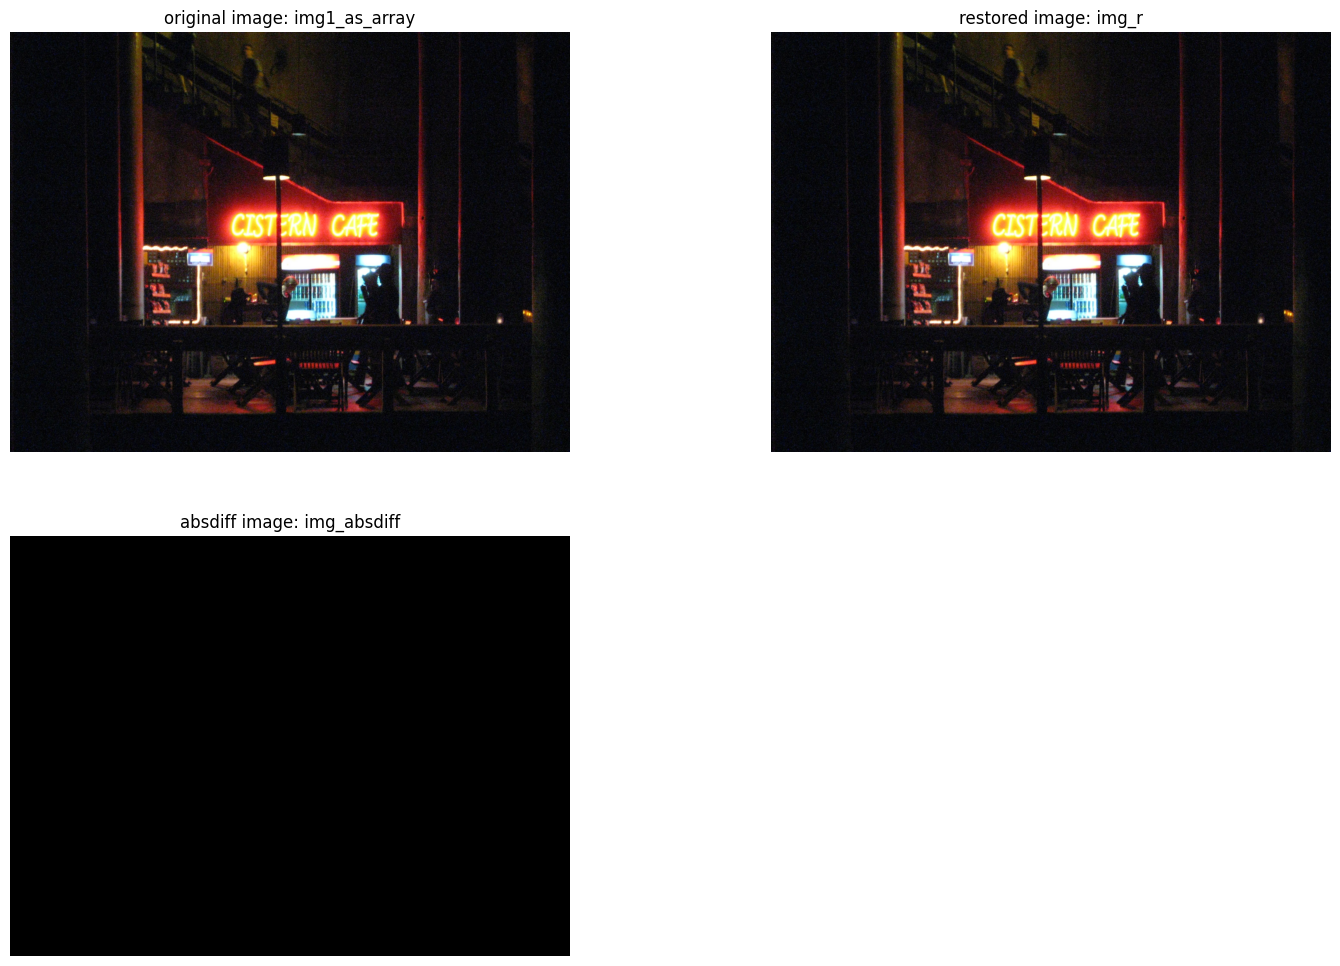

In [12]:
# absdiff of images
img_absdiff = cv2.absdiff(img1_as_array, img_r)

fig1 = plt.figure(1, figsize=[18, 12])
ax_f1 = fig1.add_subplot(2, 2, 1)
ax_f1.imshow(img1_as_array)
ax_f1.set_title('original image: img1_as_array')
ax_f1.axis('off')

ax_f2 = fig1.add_subplot(2, 2, 2)
ax_f2.imshow(img_r)
ax_f2.set_title('restored image: img_r')
ax_f2.axis('off')

ax_f3 = fig1.add_subplot(2, 2, 3)
ax_f3.imshow(img_absdiff)
ax_f3.set_title('absdiff image: img_absdiff')
ax_f3.axis('off');